# MC030 - Projeto final de Graduação
## Análise e Previsão do Mercado de Ações

## Descrição do modelo

A partir de um conjunto de cotações diárias de dólar para real (USD-BRL) desejamos modelar esse comportamento a partir de uma série de indicadores de mercado financeiro para classificarmos cada dia como um momento de compra ou momento de venda.

# ...

# Código

### Definindo endpoints da API (https://www.alphavantage.co/documentation/)

In [4]:
apiToken = '3GX5M109KQK9B6HO'
baseUrl = 'https://www.alphavantage.co/query?&outputsize=full&apikey=' + apiToken
usdBrlUrl = 'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=BRL&outputsize=full&apikey=' + apiToken
stockUrl = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo'

### Obtendo dados da API

In [5]:
import requests
import json
import time
callsMade = 0
def incrementAndVerifyCallsMade():
    global callsMade
    if callsMade == 5:
        print('Made 5 requests to the API in the last minute - sleeping for 1 minute')
        time.sleep(65)
        callsMade = 0
    callsMade += 1
def parsePriceRetrieved(stocksRetrieved):
    stockPrices = {}
    for date, candle in stocksRetrieved.items():
        stockPrices[date] = candle['1. open']
    return stockPrices
def parseIndicatorRetrieved(indicatorsRetrieved):
    indicatorValues = {}
    for date, indicator in indicatorsRetrieved.items():
        for indicatorSymbol, indicatorValue in indicator.items():
            if indicatorSymbol == 'Chaikin A/D':
                indicatorSymbol = 'AD'
            elif indicatorSymbol == 'MACD_Signal' or indicatorSymbol == 'MACD_Hist':
                continue
            indicatorValues[date] = {indicatorSymbol: indicatorValue}
    return indicatorValues
# returns [{date: price}]
def getStockPrice(stockSymbol):
    stockUrl = baseUrl + '&function=TIME_SERIES_DAILY&symbol=' + stockSymbol
    print('Fetching ' + stockUrl)
    incrementAndVerifyCallsMade()
    stocksRetrieved = requests.get(stockUrl).json();
    stocks = parsePriceRetrieved(stocksRetrieved['Time Series (Daily)'])
    print('Retrieved and parsed '+ stockUrl)
    return stocks
# returns [{date: price}]
def getForexPrice(fromSymbol, toSymbol):
    forexUrl = baseUrl + '&function=FX_DAILY&from_symbol=' + fromSymbol + '&to_symbol=' + toSymbol
    print('Fetching ' + forexUrl)
    incrementAndVerifyCallsMade()
    forexRetrieved = requests.get(forexUrl).json();
    forex = parsePriceRetrieved(forexRetrieved)
    print('Retrieved and parsed '+ forexUrl)
    return forex
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicator(indicatorFunction, symbol):
    indicatorUrl = baseUrl + '&interval=daily&series_type=open&function=' + indicatorFunction + '&symbol=' + symbol
    if indicatorFunction=='SMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='EMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='WMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='DEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='KAMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MAMA':
        indicatorUrl += '&fastlimit=0.01&slowlimit=0.01'
    elif indicatorFunction=='T3':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MACD':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9'
    elif indicatorFunction=='MACDEXT':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9&fastmatype=0&slowmatype=0&signalmatype=0'
    elif indicatorFunction=='STOCH':
        indicatorUrl += '&fastkperiod=5&slowkperiod=3&slowdperiod=3&slowkmatype=0&slowdmatype=0'
    elif indicatorFunction=='STOCHF':
        indicatorUrl += '&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='RSI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='STOCHRSI':
        indicatorUrl += '&time_period=10&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='WILLR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADXR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='APO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='PPO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='MOM':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='BOP':
        indicatorUrl += ''
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CMO':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROCR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AROON':
        indicatorUrl += '&time_period=14'
    elif indicatorFunction=='AROONOSC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MFI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ULTOSC':
        indicatorUrl += '&timeperiod1=7&timeperiod2=14&timeperiod3=28'
    elif indicatorFunction=='DX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AD':
        indicatorUrl += ''
        indicatorFunction = 'Chaikin A/D'
    elif indicatorFunction=='OBV':
        indicatorUrl += ''
    # TODO: terminar isso aqi
    print('Fetching ' + indicatorUrl)
    incrementAndVerifyCallsMade();
    indicatorRetrieved = requests.get(indicatorUrl).json()
    indicators = parseIndicatorRetrieved(indicatorRetrieved['Technical Analysis: ' + indicatorFunction])
    print('Retrieved and parsed '+ indicatorUrl)
    return indicators
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicatorList(indicatorFunctions, symbol):
    indicators = {}
    for indicatorFunction in indicatorFunctions:
        indicatorDict = getIndicator(indicatorFunction, symbol)
        for date, indicator in indicatorDict.items():
            for indicatorFunction, indicatorValue in indicator.items():
                if  date not in indicators:
                    indicators[date] = {}
                indicators[date][indicatorFunction] = indicatorValue
    return indicators

In [6]:
# Filtrando dados válidos - apenas aqueles cujas datas estão na lista de preços e de indicadores
def filterData(prices, indicators, indicatorFunctions):
    filteredPrices = {date: price for date, price in prices.items() if date in indicators.keys()}
    filteredIndicators = {date: indicators for date, indicators in indicators.items() if date in prices.keys()}
    return filteredPrices, filteredIndicators

def getData(stockSymbol, indicatorFunctions):
    stockPrices = getStockPrice(stockSymbol)
    indicators = getIndicatorList(indicatorFunctions, stockSymbol)
    stockPrices, indicators = filterData(stockPrices, indicators, indicatorFunctions)
    return stockPrices, indicators

def getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions):
    forexPrices = getForexPrice(fromForexSymbol, toForexSymbol)
    indicators = getIndicatorList(indicatorFunctions, fromForexSymbol + toForexSymbol)
    forexPrices, indicators = filterData(forexPrices, indicators)
    return forexPrices, indicators

### Métodos de anotação de dados

In [145]:
import collections

def annotateBuyOrSellTwoClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'B'
            last = 'B'
        elif float(price) < yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'S'
            last = 'S'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateBuyOrSellEightClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.005:
            dateAnnotated[yesterdayDate] = 'B0'
            last = 'B0'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.01:
            dateAnnotated[yesterdayDate] = 'B1'
            last = 'B1'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.02:
            dateAnnotated[yesterdayDate] = 'B2'
            last = 'B2'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice > 1.02:
            dateAnnotated[yesterdayDate] = 'B3'
            last = 'B3'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .995:
            dateAnnotated[yesterdayDate] = 'S0'
            last = 'S0'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .99:
            dateAnnotated[yesterdayDate] = 'S1'
            last = 'S1'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .98:
            dateAnnotated[yesterdayDate] = 'S2'
            last = 'S2'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice < .98:
            dateAnnotated[yesterdayDate] = 'S3'
            last = 'S3'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateMaxProfit(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    yesterdayPrice = 0
    currentStatus = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = value
        break
    for date, price in prices.items():
        if price > yesterdayPrice and currentStatus != 'B':
            dateAnnotated[yesterdayDate] = 'B'
            currentStatus = 'B'
        elif price < yesterdayPrice and currentStatus != 'S':
            dateAnnotated[yesterdayDate] = 'S'
            currentStatus = 'S'
        yesterdayDate = date
        yesterdayPrice = price
    return dateAnnotated

### Normalização dos dados

In [121]:
# Dúvida - como faremos a normalização?
# Ideia: normalizarmos de acordo com o preço da ação no momento

# Exemplo: temos o valor de uma ação atualmente em R$3.00, mas sua média dos últimos 10 dias é de R$2.90,
# logo esta ação está aumentando de valor. Se normalizarmos todos os indicadores de acordo com o preço atual
# da ação podemos ter mais sucesso, pois no momento de atuação do modelo tudo que ele terá acesso será o preço 
# atual da ação e seus indicadores... Normalizar de acordo com um teto e piso de valores acho que pode dar ruim.

import copy

# Normaliza um conjunto de indicadores a partir do preço da ação
def normalizeIndicators(indicatorSet, stockPrice):
    normalizedIndicatorSet = {}
    for indicatorFunction, indicatorValue in indicatorSet.items():
        normalizedIndicatorSet[indicatorFunction] = float(indicatorValue)/float(stockPrice)
    return normalizedIndicatorSet

# Retorna os indicadores normalizados: indicadores = [date: {indicators: ['SMA': 0.89, 'EMA': 0.93], annotation: 'B'}]
def getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotated):
    print('Normalizing and annotating indicators')
    indicatorsAnnotated = {}
    for date, annotation in dateAnnotated.items():
        if date not in indicatorsAnnotated:
            indicatorsAnnotated[date] = {'indicators': {}, 'annotation': ''}
        indicatorsAnnotated[date]['indicators'] = normalizeIndicators(indicators[date], stockPrices[date])
        indicatorsAnnotated[date]['annotation'] = annotation
    return indicatorsAnnotated

# Deprecated
def normalizeIndicatorsOld(indicatorsAnnotated):
    normalizedIndicators = {'B': [], 'S': []}
    for indicatorSet in indicatorsAnnotated['B']:
        normalizedIndicatorSet = []
        for indicator, value in indicatorSet.items():
            print(indicator)
            normalizedIndicatorSet.append({indicator: value/1000})
        normalizedIndicators[B].append(normalizedIndicatorSet)
    for indicators in indicatorsAnnotated['S']:
        print(indicators)

### Machine Learning

In [ ]:
import keras
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

def getModelMLP(n_steps, n_features, n_outputs):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation='relu', input_shape=(n_steps*n_features,)))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelBidirectionalLSTM(n_steps, n_features, n_outputs):    
    model = keras.models.Sequential()
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='relu'), input_shape=(n_steps, n_features)))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelCNN(n_steps, n_features):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(50, activation='relu'))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    return model

### Análise de dados

In [503]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Main

In [ ]:
# Cheat-sheet com os simbolos
__indicatorSymbols = ['SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 'MAMA',
                      'T3', 'MACD', 'MACDEXT', 'STOCH', 'STOCHF', 'RSI', 'STOCHRSI', 'WILLR', 
                      'ADX', 'ADXR', 'APO', 'PPO', 'MOM', 'BOP', 'CCI', 'CMO', 'ROC', 'ROCR',
                      'AROON', 'AROONOSC', 'MFI', 'TRIX', 'ULTOSC', 'DX', 'MINUS_DI', 'PLUS_DI',
                      'MINUS_DM', 'PLUS_DM', 'BBANDS', 'MIDPOINT', 'SAR', 'TRANGE', 'ATR',
                      'NATR', 'AD', 'ADOSC', 'OBV', 'HT_TRENDLINE', 'HT_SINE', 'HT_TRENDMODE',
                      'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR']
__forexSymbols = ['BRL', 'EUR']
__stockSymbols = ['MSFT']

# Definindo simbolos para o modelo
indicatorFunctions = ['SMA', 'EMA', 'WMA']
indicatorFunctions2 = ['SMA', 'EMA', 'MACD', 'VWAP', 'RSI', 'ADX', 'CCI', 'AD', 'OBV']
indicatorFunctions3 = ['SMA', 'EMA', 'MACD', 'VWAP', 'RSI', 'ADX', 'CCI', 'AD', 'OBV', 'MOM', 'WILLR', 'ADOSC']
# fromForexSymbol = 'USD'
# toForexSymbol = 'BRL'
stockSymbol = 'MSFT'

stockPrices, indicators = getData(stockSymbol, indicatorFunctions)
stockPrices, indicators2 = getData(stockSymbol, indicatorFunctions2)
stockPrices, indicators3 = getData(stockSymbol, indicatorFunctions3)
# forexPrices, indicators = getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions)
# dateAnnotated = annotateMaxProfit(stockPrices)

Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&function=TIME_SERIES_DAILY&symbol=MSFT
Made 5 requests to the API in the last minute - sleeping for 1 minute
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&function=TIME_SERIES_DAILY&symbol=MSFT
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=SMA&symbol=MSFT&time_period=10
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=SMA&symbol=MSFT&time_period=10
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=EMA&symbol=MSFT&time_period=10
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=EMA&symbol=MSFT&time_period=10
Fetching https://www.alp

In [ ]:
df = pd.DataFrame.from_dict(stockPrices, orient='index')

div = df[0].astype('float').div(df[0].astype('float').shift(-1))

In [ ]:
df.sort_index(inplace=True)
df[0].astype('float').plot()

In [ ]:
div.sort_index(inplace=True)
div.plot()

In [ ]:
div.describe(percentiles=[.01,.1,.25,.5,.75,.9,.95,.99])

In [ ]:
dateAnnotatedTwo = annotateBuyOrSellTwoClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotatedTwo, orient='index')
df[0].value_counts()

In [ ]:
dateAnnotatedEight = annotateBuyOrSellEightClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotatedEight, orient='index')
df[0].value_counts()

In [156]:
import pandas as pd

normalizedIndicatorsTwo = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotatedTwo)
normalizedIndicatorsEight = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotatedEight)

dataTwo = pd.DataFrame.from_dict(normalizedIndicatorsTwo, orient='index')
dataEight = pd.DataFrame.from_dict(normalizedIndicatorsEight, orient='index')

Normalizing and annotating indicators
Normalizing and annotating indicators


In [157]:
dataTwo = pd.DataFrame.merge(pd.DataFrame(dataTwo.indicators.values.tolist(), index=dataTwo.index), dataTwo, left_index=True, right_index=True, how='outer').drop(columns=['indicators'])
dataEight = pd.DataFrame.merge(pd.DataFrame(dataEight.indicators.values.tolist(), index=dataEight.index), dataEight, left_index=True, right_index=True, how='outer').drop(columns=['indicators'])

In [158]:
dataTwo.head(), dataEight.head()

(                 SMA       EMA       WMA annotation
 2019-11-21  0.989926  0.991931  0.997135          B
 2019-11-20  0.980234  0.984143  0.988606          B
 2019-11-19  0.972594  0.976915  0.980575          S
 2019-11-18  0.973906  0.977031  0.980141          S
 2019-11-15  0.977842  0.979366  0.982223          S,
                  SMA       EMA       WMA annotation
 2019-11-21  0.989926  0.991931  0.997135         B1
 2019-11-20  0.980234  0.984143  0.988606         B0
 2019-11-19  0.972594  0.976915  0.980575         S1
 2019-11-18  0.973906  0.977031  0.980141         S1
 2019-11-15  0.977842  0.979366  0.982223         S2)

In [159]:
dataTwo.annotation = dataTwo.annotation.apply(lambda x: 0 if x == 'S' else 1)

eight_dict = {"B3":0, "B2": 1, "B1": 2, "B0": 3, "S0": 4, "S1": 5, "S2": 6, "S3": 7}
dataEight.annotation = dataEight.annotation.apply(lambda x: eight_dict[x])

In [160]:
dataTwo = dataTwo.sort_index()
dataEight = dataEight.sort_index()

In [372]:
import numpy as np
import matplotlib.pyplot as plt

n_steps = 4
n_indicators = 3

batch_size = 32
train_split = .8

X = {
    "mlp": {
        2 : [],
        8 : [] 
    },
    "lstm": {
        2 : [],
        8 : []
    }
}
y = {
    2 : [],
    8 : [] 
}

for i in range(len(dataTwo)):
    end_ix = i + n_steps
    if end_ix > len(dataTwo):
        break
    seq_x, seq_y = dataTwo.iloc[i:end_ix, :-1].values, dataTwo.iloc[end_ix-1, -1]
    X["lstm"][2].append(seq_x)
    X["mlp"][2].append(seq_x.flatten())
    y[2].append(seq_y)
    
for i in range(len(dataEight)):
    end_ix = i + n_steps
    if end_ix > len(dataEight):
        break
    seq_x, seq_y = dataEight.iloc[i:end_ix, :-1].values, dataEight.iloc[end_ix-1, -1]
    X["lstm"][8].append(seq_x)
    X["mlp"][8].append(seq_x.flatten())
    y[8].append(np.eye(8)[seq_y])

X["lstm"][2] = np.array(X["lstm"][2])
X["mlp"][2] = np.array(X["mlp"][2])
y[2] = np.array(y[2])

X["lstm"][8] = np.array(X["lstm"][8])
X["mlp"][8] = np.array(X["mlp"][8])
y[8] = np.array(y[8])

In [328]:
dataTwo.head()

,SMA,EMA,WMA,annotation
1999-12-07,0.971239,0.972042,0.982787,1
1999-12-08,0.992348,0.991003,1.002084,1
1999-12-09,1.007132,1.002554,1.013524,1
1999-12-10,0.994175,0.990011,0.999999,0
1999-12-13,0.995412,0.989802,0.999010,0


In [329]:
X["lstm"][2][0]

array([[0.97123905, 0.97204222, 0.98278734],
       [0.99234792, 0.99100349, 1.0020843 ],
       [1.00713152, 1.00255435, 1.01352391],
       [0.9941751 , 0.99001124, 0.99999893]])

In [330]:
X["mlp"][2][0]

array([0.97123905, 0.97204222, 0.98278734, 0.99234792, 0.99100349,
       1.0020843 , 1.00713152, 1.00255435, 1.01352391, 0.9941751 ,
       0.99001124, 0.99999893])

In [331]:
len(X["lstm"][2])

5020

In [413]:
from sklearn.model_selection import train_test_split

X_train = {
    "mlp": {
    },
    "lstm": {
        2 : X["lstm"][2][:int(len(X["lstm"][2]) * train_split)],
        8 : X["lstm"][8][:int(len(X["lstm"][8]) * train_split)]
    }
}

X_test = {
    "mlp": {
    },
    "lstm": {
        2 : X["lstm"][2][int(len(X["lstm"][2]) * train_split):],
        8 : X["lstm"][8][int(len(X["lstm"][8]) * train_split):]
    }
}

y_train = {
    "mlp": {
    },
    "lstm": {
        2 : y[2][:int(len(y[2]) * train_split)],
        8 : y[8][:int(len(y[8]) * train_split)] 
    }
}

y_test = {
    "mlp": {
    },
    "lstm": {
        2 : y[2][int(len(y[2]) * train_split):],
        8 : y[8][int(len(y[2]) * train_split):] 
    }
}


X_train["mlp"][2], X_test["mlp"][2], y_train["mlp"][2], y_test["mlp"][2] = train_test_split(X["mlp"][2], y[2], train_size=train_split, random_state=0)
X_train["mlp"][8], X_test["mlp"][8], y_train["mlp"][8], y_test["mlp"][8] = train_test_split(X["mlp"][8], y[8], train_size=train_split, random_state=0)

In [478]:
MLP_2 = getModelMLP(n_steps, n_indicators, 1)
MLP_8 = getModelMLP(n_steps, n_indicators, 8)

LSTM_2 = getModelBidirectionalLSTM(n_steps, n_indicators, 1)
LSTM_8 = getModelBidirectionalLSTM(n_steps, n_indicators, 8)

In [479]:
MLP_2, LSTM_2, MLP_8, LSTM_8

(<keras.engine.sequential.Sequential at 0x16dabb390>,
 <keras.engine.sequential.Sequential at 0x16dd4ce10>)

In [480]:
MLP_2.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 64)                832       
_________________________________________________________________
dropout_81 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_165 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_82 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [481]:
MLP_8.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 64)                832       
_________________________________________________________________
dropout_83 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_168 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_84 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_169 (Dense)            (None, 8)                 520       
Total params: 5,512
Trainable params: 5,512
Non-trainable params: 0
_________________________________________________________________


In [482]:
LSTM_2.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_41 (Bidirectio (None, 128)               34816     
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 129       
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________


In [483]:
LSTM_8.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_42 (Bidirectio (None, 128)               34816     
_________________________________________________________________
dense_171 (Dense)            (None, 8)                 1032      
Total params: 35,848
Trainable params: 35,848
Non-trainable params: 0
_________________________________________________________________


In [484]:
preds = {
    "mlp": {2: [], 8:[]},
    "lstm": {2: [], 8:[]}
}

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 0s 132us/step - loss: 0.7017 - accuracy: 0.4922 - val_loss: 0.6935 - val_accuracy: 0.4863
Epoch 2/300
3212/3212 [==============================] - 0s 52us/step - loss: 0.6939 - accuracy: 0.5047 - val_loss: 0.6922 - val_accuracy: 0.5137
Epoch 3/300
3212/3212 [==============================] - 0s 50us/step - loss: 0.6943 - accuracy: 0.5093 - val_loss: 0.6918 - val_accuracy: 0.5149
Epoch 4/300
3212/3212 [==============================] - 0s 49us/step - loss: 0.6943 - accuracy: 0.5047 - val_loss: 0.6918 - val_accuracy: 0.5149
Epoch 5/300
3212/3212 [==============================] - 0s 51us/step - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6918 - val_accuracy: 0.5149
Epoch 6/300
3212/3212 [==============================] - 0s 51us/step - loss: 0.6926 - accuracy: 0.5156 - val_loss: 0.6921 - val_accuracy: 0.5149
Epoch 7/300
3212/3212 [==============================] - 0s 50us/step - loss

3212/3212 [==============================] - 0s 48us/step - loss: 0.4750 - accuracy: 0.7802 - val_loss: 0.4114 - val_accuracy: 0.8607
Epoch 57/300
3212/3212 [==============================] - 0s 46us/step - loss: 0.4738 - accuracy: 0.7780 - val_loss: 0.4503 - val_accuracy: 0.7711
Epoch 58/300
3212/3212 [==============================] - 0s 46us/step - loss: 0.4774 - accuracy: 0.7808 - val_loss: 0.4008 - val_accuracy: 0.8744
Epoch 59/300
3212/3212 [==============================] - 0s 48us/step - loss: 0.4615 - accuracy: 0.7936 - val_loss: 0.4026 - val_accuracy: 0.8619
Epoch 60/300
3212/3212 [==============================] - 0s 47us/step - loss: 0.4581 - accuracy: 0.7905 - val_loss: 0.4374 - val_accuracy: 0.7736
Epoch 61/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.4641 - accuracy: 0.7861 - val_loss: 0.4089 - val_accuracy: 0.8085
Epoch 62/300
3212/3212 [==============================] - 0s 46us/step - loss: 0.4468 - accuracy: 0.8029 - val_loss: 0.3924 - val_a

Epoch 112/300
3212/3212 [==============================] - 0s 59us/step - loss: 0.3550 - accuracy: 0.8390 - val_loss: 0.2497 - val_accuracy: 0.9192
Epoch 113/300
3212/3212 [==============================] - 0s 51us/step - loss: 0.3615 - accuracy: 0.8384 - val_loss: 0.3742 - val_accuracy: 0.8109
Epoch 114/300
3212/3212 [==============================] - 0s 46us/step - loss: 0.3497 - accuracy: 0.8422 - val_loss: 0.2751 - val_accuracy: 0.8918
Epoch 115/300
3212/3212 [==============================] - 0s 47us/step - loss: 0.3475 - accuracy: 0.8496 - val_loss: 0.3031 - val_accuracy: 0.8632
Epoch 116/300
3212/3212 [==============================] - 0s 47us/step - loss: 0.3443 - accuracy: 0.8490 - val_loss: 0.2898 - val_accuracy: 0.8657
Epoch 117/300
3212/3212 [==============================] - 0s 49us/step - loss: 0.3493 - accuracy: 0.8527 - val_loss: 0.3033 - val_accuracy: 0.8483
Epoch 118/300
3212/3212 [==============================] - 0s 48us/step - loss: 0.3436 - accuracy: 0.8499 - val_

3212/3212 [==============================] - 0s 44us/step - loss: 0.3457 - accuracy: 0.8437 - val_loss: 0.2858 - val_accuracy: 0.8769
Epoch 168/300
3212/3212 [==============================] - 0s 43us/step - loss: 0.3412 - accuracy: 0.8490 - val_loss: 0.2267 - val_accuracy: 0.9241
Epoch 169/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3282 - accuracy: 0.8565 - val_loss: 0.2049 - val_accuracy: 0.9428
Epoch 170/300
3212/3212 [==============================] - 0s 41us/step - loss: 0.3308 - accuracy: 0.8577 - val_loss: 0.2494 - val_accuracy: 0.8955
Epoch 171/300
3212/3212 [==============================] - 0s 43us/step - loss: 0.2981 - accuracy: 0.8717 - val_loss: 0.2593 - val_accuracy: 0.8818
Epoch 172/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3276 - accuracy: 0.8571 - val_loss: 0.2646 - val_accuracy: 0.9005
Epoch 173/300
3212/3212 [==============================] - 0s 41us/step - loss: 0.3276 - accuracy: 0.8590 - val_loss: 0.2212 -

3212/3212 [==============================] - 0s 45us/step - loss: 0.2932 - accuracy: 0.8755 - val_loss: 0.1902 - val_accuracy: 0.9403
Epoch 223/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.2941 - accuracy: 0.8776 - val_loss: 0.1803 - val_accuracy: 0.9527
Epoch 224/300
3212/3212 [==============================] - 0s 48us/step - loss: 0.2996 - accuracy: 0.8711 - val_loss: 0.2909 - val_accuracy: 0.8682
Epoch 225/300
3212/3212 [==============================] - 0s 60us/step - loss: 0.2915 - accuracy: 0.8767 - val_loss: 0.1761 - val_accuracy: 0.9403
Epoch 226/300
3212/3212 [==============================] - 0s 53us/step - loss: 0.2810 - accuracy: 0.8833 - val_loss: 0.1928 - val_accuracy: 0.9216
Epoch 227/300
3212/3212 [==============================] - 0s 51us/step - loss: 0.2587 - accuracy: 0.8910 - val_loss: 0.1765 - val_accuracy: 0.9403
Epoch 228/300
3212/3212 [==============================] - 0s 49us/step - loss: 0.2784 - accuracy: 0.8829 - val_loss: 0.1942 -

3212/3212 [==============================] - 0s 44us/step - loss: 0.3280 - accuracy: 0.8509 - val_loss: 0.2527 - val_accuracy: 0.8843
Epoch 278/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.2961 - accuracy: 0.8776 - val_loss: 0.1913 - val_accuracy: 0.9167
Epoch 279/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.2862 - accuracy: 0.8839 - val_loss: 0.1704 - val_accuracy: 0.9490
Epoch 280/300
3212/3212 [==============================] - 0s 43us/step - loss: 0.2623 - accuracy: 0.8976 - val_loss: 0.1793 - val_accuracy: 0.9440
Epoch 281/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.2894 - accuracy: 0.8814 - val_loss: 0.1879 - val_accuracy: 0.9241
Epoch 282/300
3212/3212 [==============================] - 0s 44us/step - loss: 0.3065 - accuracy: 0.8711 - val_loss: 0.1889 - val_accuracy: 0.9415
Epoch 283/300
3212/3212 [==============================] - 0s 45us/step - loss: 0.2937 - accuracy: 0.8776 - val_loss: 0.1749 -

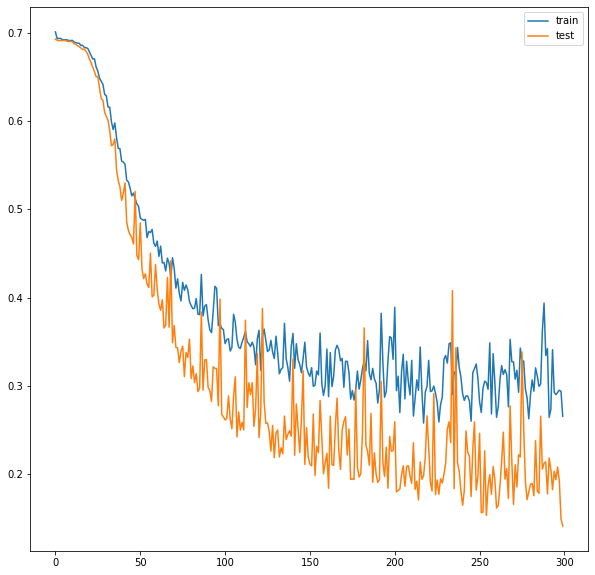

In [485]:
history_mlp_2 = MLP_2.fit(X_train["mlp"][2], y_train["mlp"][2], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_mlp_2.history['loss'], label='train')
plt.plot(history_mlp_2.history['val_loss'], label='test')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           S    0.94851   0.95418   0.95134       502
           B    0.95391   0.94821   0.95105       502

    accuracy                        0.95120      1004
   macro avg    0.95121   0.95120   0.95119      1004
weighted avg    0.95121   0.95120   0.95119      1004

Confusion matrix, without normalization
[[479  23]
 [ 26 476]]


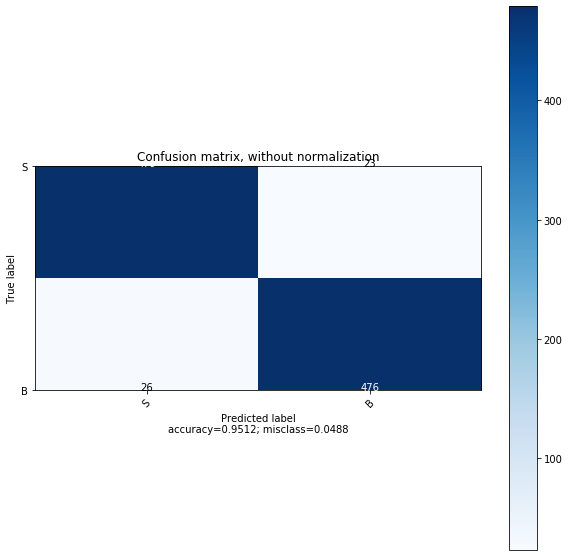

In [504]:
preds["mlp"][2] = MLP_2.predict(X_test["mlp"][2], batch_size=batch_size)
print(classification_report(y_test["mlp"][2], np.rint(preds["mlp"][2]).astype(np.int64), target_names=["S","B"], digits=5))
conf = plot_confusion_matrix(y_test["mlp"][2], np.rint(preds["mlp"][2]).astype(np.int64), classes=np.array(["S","B"]))

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 1s 171us/step - loss: 2.0786 - accuracy: 0.1532 - val_loss: 2.0641 - val_accuracy: 0.1604
Epoch 2/300
3212/3212 [==============================] - 0s 77us/step - loss: 2.0661 - accuracy: 0.1638 - val_loss: 2.0628 - val_accuracy: 0.1604
Epoch 3/300
3212/3212 [==============================] - 0s 58us/step - loss: 2.0615 - accuracy: 0.1675 - val_loss: 2.0643 - val_accuracy: 0.1604
Epoch 4/300
3212/3212 [==============================] - 0s 51us/step - loss: 2.0603 - accuracy: 0.1669 - val_loss: 2.0618 - val_accuracy: 0.1604
Epoch 5/300
3212/3212 [==============================] - 0s 47us/step - loss: 2.0610 - accuracy: 0.1706 - val_loss: 2.0609 - val_accuracy: 0.1604
Epoch 6/300
3212/3212 [==============================] - 0s 52us/step - loss: 2.0580 - accuracy: 0.1743 - val_loss: 2.0623 - val_accuracy: 0.1604
Epoch 7/300
3212/3212 [==============================] - 0s 46us/step - loss

3212/3212 [==============================] - 0s 41us/step - loss: 1.6563 - accuracy: 0.3334 - val_loss: 1.6173 - val_accuracy: 0.3507
Epoch 57/300
3212/3212 [==============================] - 0s 42us/step - loss: 1.6492 - accuracy: 0.3319 - val_loss: 1.5488 - val_accuracy: 0.4378
Epoch 58/300
3212/3212 [==============================] - 0s 51us/step - loss: 1.6379 - accuracy: 0.3465 - val_loss: 1.5533 - val_accuracy: 0.4017
Epoch 59/300
3212/3212 [==============================] - 0s 45us/step - loss: 1.6272 - accuracy: 0.3524 - val_loss: 1.5232 - val_accuracy: 0.4279
Epoch 60/300
3212/3212 [==============================] - 0s 40us/step - loss: 1.6093 - accuracy: 0.3540 - val_loss: 1.5288 - val_accuracy: 0.4453
Epoch 61/300
3212/3212 [==============================] - 0s 43us/step - loss: 1.6160 - accuracy: 0.3425 - val_loss: 1.5006 - val_accuracy: 0.4565
Epoch 62/300
3212/3212 [==============================] - 0s 42us/step - loss: 1.6065 - accuracy: 0.3509 - val_loss: 1.4994 - val_a

Epoch 112/300
3212/3212 [==============================] - 0s 40us/step - loss: 1.2957 - accuracy: 0.4564 - val_loss: 1.1639 - val_accuracy: 0.4963
Epoch 113/300
3212/3212 [==============================] - 0s 41us/step - loss: 1.2912 - accuracy: 0.4673 - val_loss: 1.1347 - val_accuracy: 0.5585
Epoch 114/300
3212/3212 [==============================] - 0s 42us/step - loss: 1.2931 - accuracy: 0.4561 - val_loss: 1.1328 - val_accuracy: 0.6082
Epoch 115/300
3212/3212 [==============================] - 0s 49us/step - loss: 1.2752 - accuracy: 0.4630 - val_loss: 1.1692 - val_accuracy: 0.4701
Epoch 116/300
3212/3212 [==============================] - 0s 41us/step - loss: 1.3057 - accuracy: 0.4499 - val_loss: 1.1462 - val_accuracy: 0.5249
Epoch 117/300
3212/3212 [==============================] - 0s 43us/step - loss: 1.2842 - accuracy: 0.4642 - val_loss: 1.1358 - val_accuracy: 0.6430
Epoch 118/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.3151 - accuracy: 0.4549 - val_

3212/3212 [==============================] - 0s 43us/step - loss: 1.1351 - accuracy: 0.5162 - val_loss: 0.9316 - val_accuracy: 0.7736
Epoch 168/300
3212/3212 [==============================] - 0s 40us/step - loss: 1.1455 - accuracy: 0.5252 - val_loss: 0.9262 - val_accuracy: 0.7488
Epoch 169/300
3212/3212 [==============================] - 0s 42us/step - loss: 1.1268 - accuracy: 0.5246 - val_loss: 0.9128 - val_accuracy: 0.7960
Epoch 170/300
3212/3212 [==============================] - 0s 42us/step - loss: 1.1452 - accuracy: 0.5125 - val_loss: 0.9048 - val_accuracy: 0.7488
Epoch 171/300
3212/3212 [==============================] - 0s 43us/step - loss: 1.1199 - accuracy: 0.5280 - val_loss: 0.9459 - val_accuracy: 0.7251
Epoch 172/300
3212/3212 [==============================] - 0s 43us/step - loss: 1.1571 - accuracy: 0.5168 - val_loss: 0.9209 - val_accuracy: 0.7910
Epoch 173/300
3212/3212 [==============================] - 0s 40us/step - loss: 1.1123 - accuracy: 0.5367 - val_loss: 0.9407 -

3212/3212 [==============================] - 0s 44us/step - loss: 1.0586 - accuracy: 0.5517 - val_loss: 0.8303 - val_accuracy: 0.8047
Epoch 223/300
3212/3212 [==============================] - 0s 49us/step - loss: 1.0425 - accuracy: 0.5539 - val_loss: 0.8974 - val_accuracy: 0.6206
Epoch 224/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0566 - accuracy: 0.5324 - val_loss: 0.8310 - val_accuracy: 0.6965
Epoch 225/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0488 - accuracy: 0.5651 - val_loss: 0.8008 - val_accuracy: 0.8296
Epoch 226/300
3212/3212 [==============================] - 0s 51us/step - loss: 1.0408 - accuracy: 0.5657 - val_loss: 0.9163 - val_accuracy: 0.5473
Epoch 227/300
3212/3212 [==============================] - 0s 47us/step - loss: 1.0344 - accuracy: 0.5744 - val_loss: 0.8166 - val_accuracy: 0.7935
Epoch 228/300
3212/3212 [==============================] - 0s 44us/step - loss: 1.0320 - accuracy: 0.5598 - val_loss: 0.8922 -

3212/3212 [==============================] - 0s 58us/step - loss: 0.9717 - accuracy: 0.5912 - val_loss: 0.7578 - val_accuracy: 0.8545
Epoch 278/300
3212/3212 [==============================] - 0s 67us/step - loss: 0.9719 - accuracy: 0.5887 - val_loss: 0.8045 - val_accuracy: 0.6940
Epoch 279/300
3212/3212 [==============================] - 0s 65us/step - loss: 0.9856 - accuracy: 0.5806 - val_loss: 0.7775 - val_accuracy: 0.7649
Epoch 280/300
3212/3212 [==============================] - 0s 54us/step - loss: 0.9999 - accuracy: 0.5616 - val_loss: 0.7363 - val_accuracy: 0.8470
Epoch 281/300
3212/3212 [==============================] - 0s 52us/step - loss: 1.0391 - accuracy: 0.5439 - val_loss: 0.7545 - val_accuracy: 0.8072
Epoch 282/300
3212/3212 [==============================] - 0s 50us/step - loss: 0.9683 - accuracy: 0.5806 - val_loss: 0.8467 - val_accuracy: 0.6182
Epoch 283/300
3212/3212 [==============================] - 0s 51us/step - loss: 1.0081 - accuracy: 0.5769 - val_loss: 0.8846 -

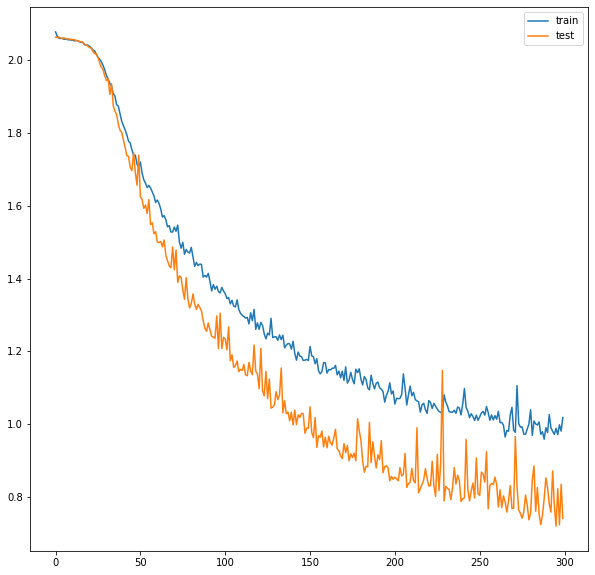

In [487]:
history_mlp_8 = MLP_8.fit(X_train["mlp"][8], y_train["mlp"][8], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_mlp_8.history['loss'], label='train')
plt.plot(history_mlp_8.history['val_loss'], label='test')
plt.legend()
plt.show()

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          B3    0.97531   0.85870   0.91329        92
          B2    0.97143   0.56667   0.71579       120
          B1    0.00000   0.00000   0.00000       136
          B0    0.89583   0.27922   0.42574       154
          S0    0.89286   0.67114   0.76628       149
          S1    0.00000   0.00000   0.00000       134
          S2    0.72340   0.78462   0.75277       130
          S3    0.93258   0.93258   0.93258        89

   micro avg    0.87638   0.47311   0.61449      1004
   macro avg    0.67393   0.51162   0.56331      1004
weighted avg    0.65173   0.47311   0.52840      1004
 samples avg    0.47311   0.47311   0.47311      1004

Confusion matrix, without normalization
[[ 90   2   0   0   0   0   0   0]
 [ 51  68   0   0   1   0   0   0]
 [131   0   0   4   1   0   0   0]
 [104   0   0  43   7   0   0   0]
 [ 48   0   0   1 100   0   0   0]
 [ 94   0   1   0   3   0  36   0]
 [ 22   0   0   0   0   0 102   6]
 [  3   0 

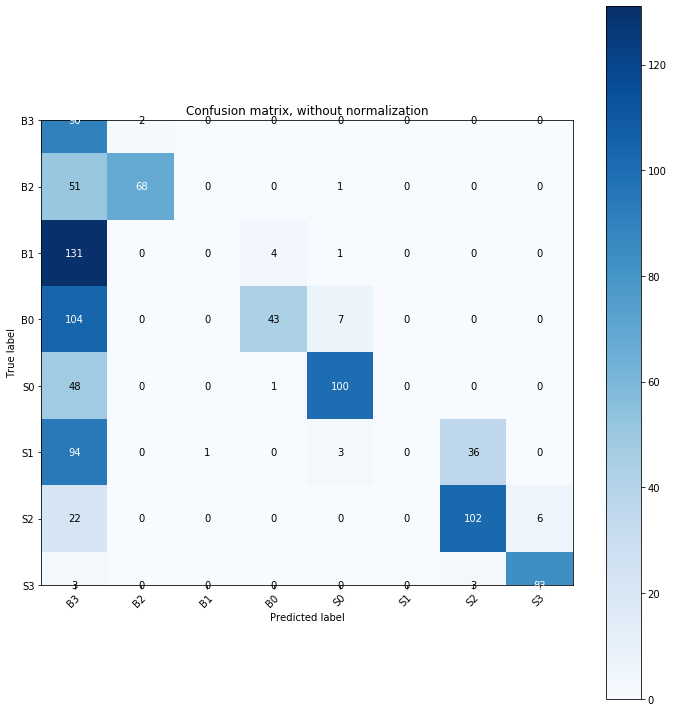

In [488]:
preds["mlp"][8] = MLP_8.predict(X_test["mlp"][8], batch_size=batch_size)
print(classification_report(y_test["mlp"][8], np.rint(preds["mlp"][8]), target_names=eight_dict.keys(), digits=5))
conf = plot_confusion_matrix(y_test["mlp"][8].argmax(axis=1), np.rint(preds["mlp"][8]).argmax(axis=1), classes=np.array(list(eight_dict.keys())))

Train on 3212 samples, validate on 804 samples
Epoch 1/200
3212/3212 [==============================] - 1s 449us/step - loss: 0.6960 - accuracy: 0.4860 - val_loss: 0.6940 - val_accuracy: 0.4851
Epoch 2/200
3212/3212 [==============================] - 1s 161us/step - loss: 0.6936 - accuracy: 0.5047 - val_loss: 0.6928 - val_accuracy: 0.5149
Epoch 3/200
3212/3212 [==============================] - 0s 155us/step - loss: 0.6939 - accuracy: 0.5059 - val_loss: 0.6944 - val_accuracy: 0.4851
Epoch 4/200
3212/3212 [==============================] - 1s 161us/step - loss: 0.6933 - accuracy: 0.5084 - val_loss: 0.6935 - val_accuracy: 0.4851
Epoch 5/200
3212/3212 [==============================] - 1s 160us/step - loss: 0.6931 - accuracy: 0.5019 - val_loss: 0.6935 - val_accuracy: 0.4851
Epoch 6/200
3212/3212 [==============================] - 1s 162us/step - loss: 0.6935 - accuracy: 0.4932 - val_loss: 0.6936 - val_accuracy: 0.4851
Epoch 7/200
3212/3212 [==============================] - 1s 162us/step 

3212/3212 [==============================] - 1s 158us/step - loss: 0.4856 - accuracy: 0.7849 - val_loss: 0.4840 - val_accuracy: 0.8818
Epoch 57/200
3212/3212 [==============================] - 1s 161us/step - loss: 0.4737 - accuracy: 0.7989 - val_loss: 0.4787 - val_accuracy: 0.8495
Epoch 58/200
3212/3212 [==============================] - 1s 160us/step - loss: 0.4621 - accuracy: 0.8051 - val_loss: 0.4783 - val_accuracy: 0.7873
Epoch 59/200
3212/3212 [==============================] - 1s 158us/step - loss: 0.4626 - accuracy: 0.7883 - val_loss: 0.5096 - val_accuracy: 0.6803
Epoch 60/200
3212/3212 [==============================] - 1s 160us/step - loss: 0.4366 - accuracy: 0.8316 - val_loss: 0.4843 - val_accuracy: 0.7189
Epoch 61/200
3212/3212 [==============================] - 1s 165us/step - loss: 0.4413 - accuracy: 0.8035 - val_loss: 0.4402 - val_accuracy: 0.9229
Epoch 62/200
3212/3212 [==============================] - 1s 166us/step - loss: 0.4236 - accuracy: 0.8502 - val_loss: 0.4323 

3212/3212 [==============================] - 1s 160us/step - loss: 0.2517 - accuracy: 0.9026 - val_loss: 0.2427 - val_accuracy: 0.9726
Epoch 112/200
3212/3212 [==============================] - 1s 161us/step - loss: 0.2467 - accuracy: 0.9103 - val_loss: 0.7757 - val_accuracy: 0.6194
Epoch 113/200
3212/3212 [==============================] - 1s 159us/step - loss: 0.2606 - accuracy: 0.9010 - val_loss: 0.2753 - val_accuracy: 0.8682
Epoch 114/200
3212/3212 [==============================] - 1s 160us/step - loss: 0.2421 - accuracy: 0.9072 - val_loss: 0.3155 - val_accuracy: 0.8197
Epoch 115/200
3212/3212 [==============================] - 1s 163us/step - loss: 0.2355 - accuracy: 0.9215 - val_loss: 0.2370 - val_accuracy: 0.9391
Epoch 116/200
3212/3212 [==============================] - 1s 164us/step - loss: 0.2588 - accuracy: 0.8829 - val_loss: 0.3861 - val_accuracy: 0.7699
Epoch 117/200
3212/3212 [==============================] - 1s 161us/step - loss: 0.2753 - accuracy: 0.8826 - val_loss: 0

3212/3212 [==============================] - 1s 160us/step - loss: 0.1820 - accuracy: 0.9262 - val_loss: 0.2131 - val_accuracy: 0.9005
Epoch 167/200
3212/3212 [==============================] - 1s 161us/step - loss: 0.1795 - accuracy: 0.9331 - val_loss: 0.1740 - val_accuracy: 0.9540
Epoch 168/200
3212/3212 [==============================] - 1s 167us/step - loss: 0.1858 - accuracy: 0.9318 - val_loss: 0.1787 - val_accuracy: 0.9527
Epoch 169/200
3212/3212 [==============================] - 1s 165us/step - loss: 0.1996 - accuracy: 0.9163 - val_loss: 0.1694 - val_accuracy: 0.9714
Epoch 170/200
3212/3212 [==============================] - 1s 167us/step - loss: 0.1883 - accuracy: 0.9247 - val_loss: 0.4392 - val_accuracy: 0.7600
Epoch 171/200
3212/3212 [==============================] - 1s 179us/step - loss: 0.2039 - accuracy: 0.9156 - val_loss: 0.1685 - val_accuracy: 0.9764
Epoch 172/200
3212/3212 [==============================] - 1s 166us/step - loss: 0.2408 - accuracy: 0.8917 - val_loss: 0

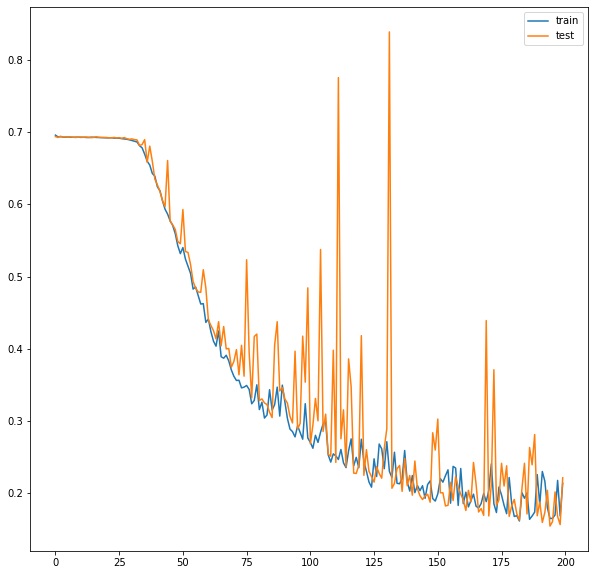

In [489]:
history_lstm_2 = LSTM_2.fit(X_train["lstm"][2], y_train["lstm"][2], epochs=200, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_lstm_2.history['loss'], label='train')
plt.plot(history_lstm_2.history['val_loss'], label='test')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           S    1.00000   0.75979   0.86350       562
           B    0.76603   1.00000   0.86752       442

    accuracy                        0.86554      1004
   macro avg    0.88302   0.87989   0.86551      1004
weighted avg    0.89700   0.86554   0.86527      1004

Confusion matrix, without normalization
[[427 135]
 [  0 442]]


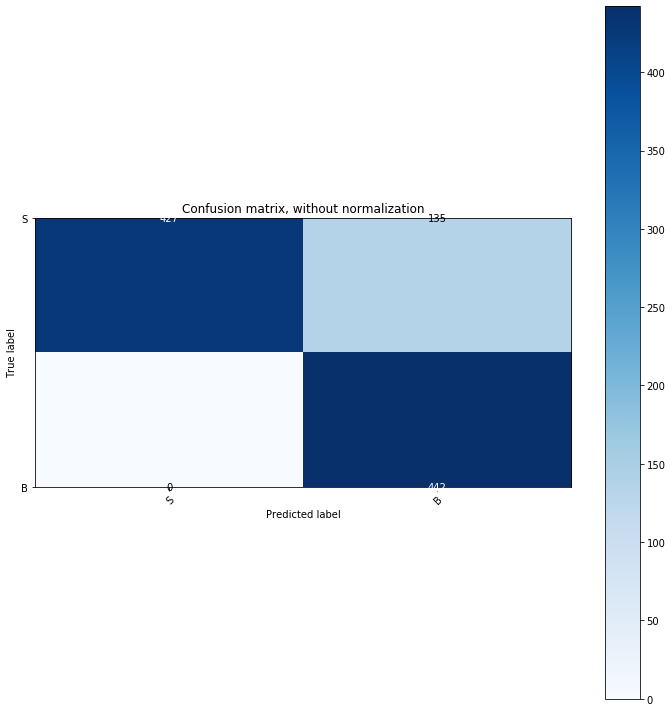

In [490]:
preds["lstm"][2] = LSTM_2.predict(X_test["lstm"][2], batch_size=batch_size)
print(classification_report(y_test["lstm"][2], np.rint(preds["lstm"][2]).astype(np.int64), target_names=["S","B"], digits=5))
conf = plot_confusion_matrix(y_test["lstm"][2], np.rint(preds["lstm"][2]).astype(np.int64), classes=np.array(["S","B"]))

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 1s 455us/step - loss: 2.0787 - accuracy: 0.1438 - val_loss: 2.0675 - val_accuracy: 0.1667
Epoch 2/300
3212/3212 [==============================] - 1s 183us/step - loss: 2.0752 - accuracy: 0.1469 - val_loss: 2.0609 - val_accuracy: 0.1642
Epoch 3/300
3212/3212 [==============================] - 1s 179us/step - loss: 2.0743 - accuracy: 0.1463 - val_loss: 2.0598 - val_accuracy: 0.1642
Epoch 4/300
3212/3212 [==============================] - 1s 175us/step - loss: 2.0745 - accuracy: 0.1454 - val_loss: 2.0615 - val_accuracy: 0.1642
Epoch 5/300
3212/3212 [==============================] - 1s 173us/step - loss: 2.0742 - accuracy: 0.1395 - val_loss: 2.0629 - val_accuracy: 0.1642
Epoch 6/300
3212/3212 [==============================] - 1s 181us/step - loss: 2.0739 - accuracy: 0.1504 - val_loss: 2.0621 - val_accuracy: 0.1642
Epoch 7/300
3212/3212 [==============================] - 1s 177us/step 

3212/3212 [==============================] - 1s 166us/step - loss: 2.0563 - accuracy: 0.1669 - val_loss: 2.0435 - val_accuracy: 0.1704
Epoch 57/300
3212/3212 [==============================] - 1s 162us/step - loss: 2.0520 - accuracy: 0.1722 - val_loss: 2.0466 - val_accuracy: 0.1878
Epoch 58/300
3212/3212 [==============================] - 1s 161us/step - loss: 2.0409 - accuracy: 0.1796 - val_loss: 2.0639 - val_accuracy: 0.0858
Epoch 59/300
3212/3212 [==============================] - 1s 157us/step - loss: 2.0295 - accuracy: 0.1905 - val_loss: 2.0174 - val_accuracy: 0.1741
Epoch 60/300
3212/3212 [==============================] - 1s 161us/step - loss: 2.0183 - accuracy: 0.1896 - val_loss: 2.0137 - val_accuracy: 0.1891
Epoch 61/300
3212/3212 [==============================] - 1s 161us/step - loss: 2.0045 - accuracy: 0.2123 - val_loss: 2.0031 - val_accuracy: 0.2002
Epoch 62/300
3212/3212 [==============================] - 1s 164us/step - loss: 1.9916 - accuracy: 0.2101 - val_loss: 1.9859 

3212/3212 [==============================] - 1s 163us/step - loss: 1.5387 - accuracy: 0.4075 - val_loss: 1.8670 - val_accuracy: 0.0970
Epoch 112/300
3212/3212 [==============================] - 1s 163us/step - loss: 1.5250 - accuracy: 0.4191 - val_loss: 1.6075 - val_accuracy: 0.3383
Epoch 113/300
3212/3212 [==============================] - 1s 164us/step - loss: 1.5193 - accuracy: 0.4075 - val_loss: 1.5622 - val_accuracy: 0.3943
Epoch 114/300
3212/3212 [==============================] - 1s 164us/step - loss: 1.5233 - accuracy: 0.3951 - val_loss: 1.5687 - val_accuracy: 0.3595
Epoch 115/300
3212/3212 [==============================] - 1s 163us/step - loss: 1.5023 - accuracy: 0.4116 - val_loss: 1.5774 - val_accuracy: 0.3470
Epoch 116/300
3212/3212 [==============================] - 1s 162us/step - loss: 1.4796 - accuracy: 0.4436 - val_loss: 1.5247 - val_accuracy: 0.4515
Epoch 117/300
3212/3212 [==============================] - 1s 170us/step - loss: 1.4620 - accuracy: 0.4511 - val_loss: 1

3212/3212 [==============================] - 1s 170us/step - loss: 1.1612 - accuracy: 0.5314 - val_loss: 1.2114 - val_accuracy: 0.4851
Epoch 167/300
3212/3212 [==============================] - 1s 165us/step - loss: 1.1622 - accuracy: 0.5308 - val_loss: 1.1953 - val_accuracy: 0.4975
Epoch 168/300
3212/3212 [==============================] - 1s 167us/step - loss: 1.1404 - accuracy: 0.5479 - val_loss: 1.1438 - val_accuracy: 0.5721
Epoch 169/300
3212/3212 [==============================] - 1s 162us/step - loss: 1.1294 - accuracy: 0.5598 - val_loss: 1.1592 - val_accuracy: 0.5560
Epoch 170/300
3212/3212 [==============================] - 1s 163us/step - loss: 1.1487 - accuracy: 0.5374 - val_loss: 1.2305 - val_accuracy: 0.4353
Epoch 171/300
3212/3212 [==============================] - 1s 162us/step - loss: 1.1622 - accuracy: 0.5121 - val_loss: 1.1527 - val_accuracy: 0.5224
Epoch 172/300
3212/3212 [==============================] - 1s 163us/step - loss: 1.1575 - accuracy: 0.5187 - val_loss: 1

3212/3212 [==============================] - 1s 163us/step - loss: 1.0730 - accuracy: 0.5610 - val_loss: 1.2723 - val_accuracy: 0.3731
Epoch 222/300
3212/3212 [==============================] - 1s 167us/step - loss: 1.0538 - accuracy: 0.5595 - val_loss: 1.1620 - val_accuracy: 0.5000
Epoch 223/300
3212/3212 [==============================] - 1s 162us/step - loss: 1.0610 - accuracy: 0.5557 - val_loss: 1.1091 - val_accuracy: 0.5100
Epoch 224/300
3212/3212 [==============================] - 1s 161us/step - loss: 1.0173 - accuracy: 0.5875 - val_loss: 1.2559 - val_accuracy: 0.3769
Epoch 225/300
3212/3212 [==============================] - 1s 157us/step - loss: 1.0455 - accuracy: 0.5710 - val_loss: 1.1080 - val_accuracy: 0.4963
Epoch 226/300
3212/3212 [==============================] - 1s 161us/step - loss: 1.0550 - accuracy: 0.5588 - val_loss: 1.1264 - val_accuracy: 0.4888
Epoch 227/300
3212/3212 [==============================] - 1s 162us/step - loss: 1.0510 - accuracy: 0.5638 - val_loss: 1

3212/3212 [==============================] - 1s 162us/step - loss: 0.9722 - accuracy: 0.5757 - val_loss: 0.9053 - val_accuracy: 0.6480
Epoch 277/300
3212/3212 [==============================] - 1s 161us/step - loss: 0.9360 - accuracy: 0.6059 - val_loss: 0.9339 - val_accuracy: 0.6007
Epoch 278/300
3212/3212 [==============================] - 1s 165us/step - loss: 0.9189 - accuracy: 0.6230 - val_loss: 0.8748 - val_accuracy: 0.7164
Epoch 279/300
3212/3212 [==============================] - 1s 163us/step - loss: 0.8817 - accuracy: 0.6578 - val_loss: 0.9146 - val_accuracy: 0.6567
Epoch 280/300
3212/3212 [==============================] - 1s 163us/step - loss: 0.8573 - accuracy: 0.6641 - val_loss: 0.9364 - val_accuracy: 0.5759
Epoch 281/300
3212/3212 [==============================] - 1s 164us/step - loss: 0.8560 - accuracy: 0.6426 - val_loss: 0.9080 - val_accuracy: 0.6281
Epoch 282/300
3212/3212 [==============================] - 1s 163us/step - loss: 0.8610 - accuracy: 0.6594 - val_loss: 0

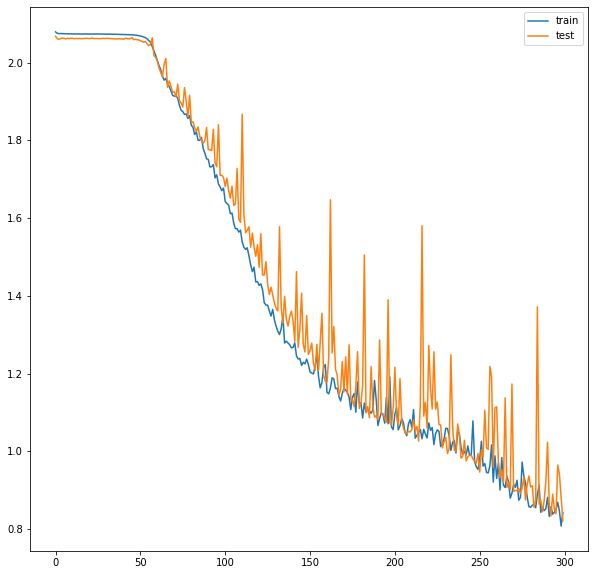

In [491]:
history_lstm_8 = LSTM_8.fit(X_train["lstm"][8], y_train["lstm"][8], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_lstm_8.history['loss'], label='train')
plt.plot(history_lstm_8.history['val_loss'], label='test')
plt.legend()
plt.show()

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          B3    0.96000   0.94118   0.95050        51
          B2    0.87059   0.75510   0.80874        98
          B1    0.00000   0.00000   0.00000       119
          B0    1.00000   0.00575   0.01143       174
          S0    0.66667   0.00909   0.01794       220
          S1    0.00000   0.00000   0.00000       136
          S2    0.87333   0.88514   0.87919       148
          S3    1.00000   0.74138   0.85149        58

   micro avg    0.90060   0.29781   0.44760      1004
   macro avg    0.67132   0.41720   0.43991      1004
weighted avg    0.63964   0.29781   0.31193      1004
 samples avg    0.29781   0.29781   0.29781      1004

Confusion matrix, without normalization
[[ 48   3   0   0   0   0   0   0]
 [ 24  74   0   0   0   0   0   0]
 [112   7   0   0   0   0   0   0]
 [172   1   0   1   0   0   0   0]
 [218   0   0   0   2   0   0   0]
 [129   0   0   0   1   0   6   0]
 [ 17   0   0   0   0   0 131   0]
 [  2   0 

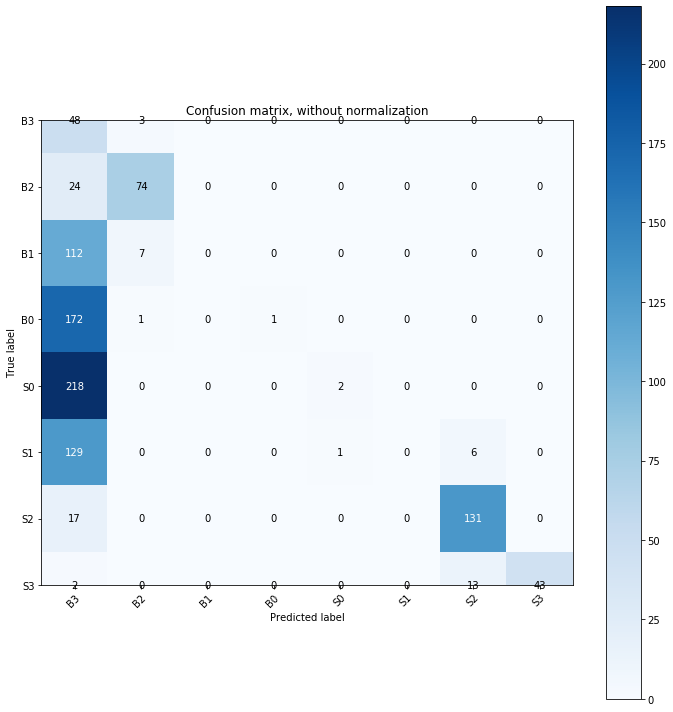

In [492]:
preds["lstm"][8] = LSTM_8.predict(X_test["lstm"][8], batch_size=batch_size)
print(classification_report(y_test["lstm"][8], np.rint(preds["lstm"][8]).astype(np.int64), target_names=eight_dict.keys(), digits=5))
conf = plot_confusion_matrix(y_test["lstm"][8].argmax(axis=1), np.rint(preds["lstm"][8]).argmax(axis=1), classes=np.array(list(eight_dict.keys())))